In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import odeint # integrate ODEs

In [2]:
def dxdt(x, t, kappa, beta, A, omega):
    x1, x2 = x
    dx1dt = x2
    dx2dt = - kappa * x1 - beta * x2 + A * np.cos(omega * t)
    return dx1dt, dx2dt

In [3]:
kappa = 10
beta = 1
A = 1
omega = 2*np.pi
x0 = 1, 0

t = np.linspace(0, 10, 101)

In [4]:
x1, x2 = odeint(dxdt, x0, t, args=(kappa, beta, A, omega)).T

In [5]:
possible_kappas = np.linspace(1, 10, 501)
possible_betas = np.linspace(0, 1, 501)
possible_As = np.linspace(0, 2, 501)
possible_omegas = np.linspace(0, 5, 501)

In [6]:
x1s = []
act_kappas = []
act_betas = []
act_As = []
act_omegas = []


for config in np.arange(0, 20000):
    kappa = np.random.choice(possible_kappas)
    beta = np.random.choice(possible_betas)
    A = np.random.choice(possible_As)
    omega = np.random.choice(possible_omegas)
    x1, x2 = odeint(dxdt, x0, t, args=(kappa, beta, A, omega)).T
    x1s.append(x1)
    act_kappas.append(kappa)
    act_betas.append(beta)
    act_As.append(A)
    act_omegas.append(omega)

    
x1s = np.array(x1s)
act_kappas = np.array(act_kappas)
act_betas = np.array(act_betas)
act_As = np.array(act_As)
act_omegas = np.array(act_omegas)

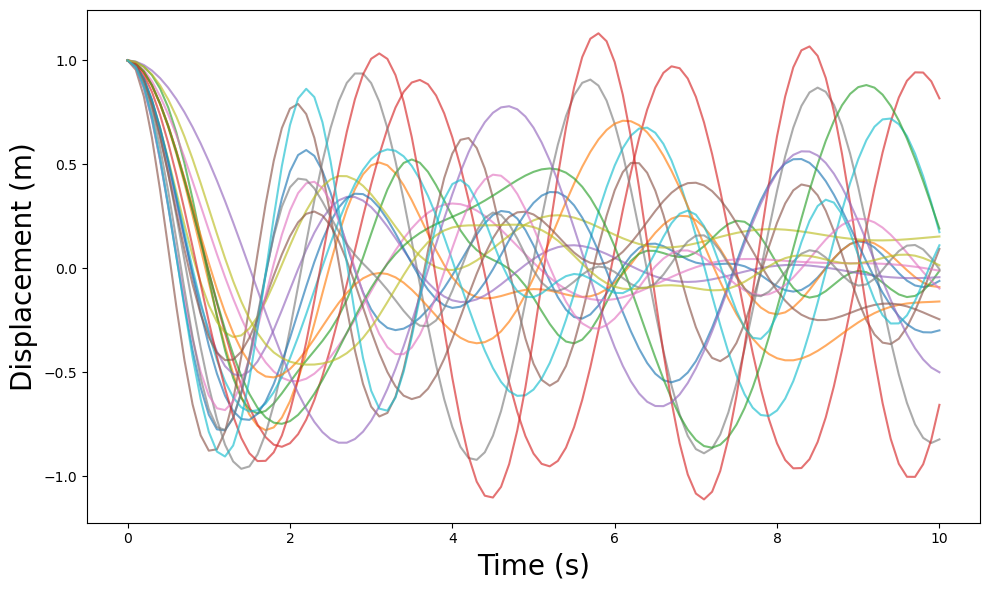

In [7]:
fontsize=20

plt.figure(figsize=(10, 6))
plt.plot(t, x1s[0:20].T, alpha=0.65)  # Plotting with some transparency for better visibility of overlapping lines

plt.xlabel('Time (s)', fontsize=fontsize)  # Label for the x-axis
plt.ylabel('Displacement (m)', fontsize=fontsize)  # Label for the y-axis

plt.tight_layout()  # Adjusting the layout so everything fits without overlapping
plt.savefig('time_series_ddp')
plt.show()


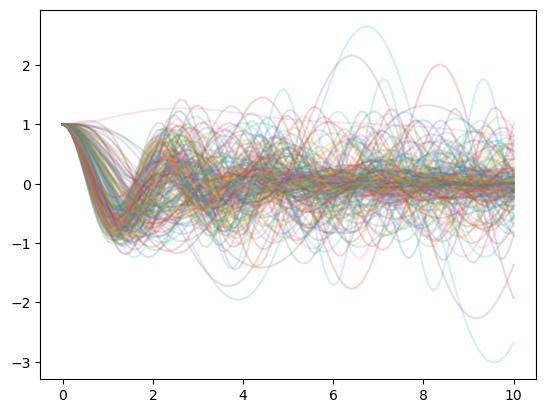

In [8]:
plt.plot(t, x1s[0:200].T, alpha=0.2)
plt.show()

In [9]:
np.save('driven_damped_pendulum_data.npy', x1s)

In [10]:
np.savetxt('driven_damped_pendulum_data_params.dat', np.c_[act_kappas, act_betas])

In [11]:
np.save('driven_damped_pendulum_data_train.npy', x1s[0:14000])
np.save('driven_damped_pendulum_data_valid.npy', x1s[14000:18000])
np.save('driven_damped_pendulum_data_test.npy', x1s[18000:])

np.savetxt('driven_damped_pendulum_data_params_train.dat', np.c_[act_kappas[0:14000], act_betas[0:14000], act_As[0:14000], act_omegas[0:14000]])
np.savetxt('driven_damped_pendulum_data_params_valid.dat', np.c_[act_kappas[14000:18000], act_betas[14000:18000], act_As[14000:18000], act_omegas[14000:18000]])
np.savetxt('driven_damped_pendulum_data_params_test.dat', np.c_[act_kappas[18000:], act_betas[18000:], act_As[18000:], act_omegas[18000:]])

## extra data for variational autoencoder with question

In [12]:
def analytic_sol(t, kappa, beta, A, omega):
    omega_natural = np.sqrt(kappa)
    omega_damped = np.sqrt(omega_natural**2 - (beta/2)**2)
    phi = np.arctan2(beta/2, omega_natural)
    
    # Calculate the amplitude of the response due to driving force
    amplitude = A / np.sqrt((omega_natural**2 - omega**2)**2 + (beta*omega/2)**2)
    
    # Calculate the phase shift
    phase_shift = np.arctan2(beta*omega/2, omega_natural**2 - omega**2)
    
    # Calculate the forced response
    forced_response = amplitude * np.cos(omega * t - phase_shift)
    
    # Calculate the transient response
    transient_response = np.exp(-beta*t/2) * (np.cos(omega_damped * t + phi))
    
    return forced_response + transient_response

In [13]:
# def dxdt(x, t, kappa, beta):
#     x1, x2 = x
#     dx1dt = x2
#     dx2dt = - kappa * x1 - beta * x2
#     return dx1dt, dx2dt

# def analytic_sol(t, kappa, beta):
#     omega = np.sqrt(kappa)*np.sqrt(1-beta**2/(4*kappa))
#     return np.exp(-beta*t/2)*np.cos(omega*t)

In [14]:
# def dxdt(x, t, kappa, beta, A, omega):
#     x1, x2 = x
#     dx1dt = x2
#     dx2dt = - kappa * x1 - beta * x2 + A * np.cos(omega * t)
#     return dx1dt, dx2dt

# def analytic_sol(t, kappa, beta, omega, F=1):
#     omega = np.sqrt(kappa)*np.sqrt(1-beta**2/(4*kappa))
#     return F * np.cos(omega * t) * np.exp(-beta * t / 2)

In [15]:
# def dxdt(x, t, kappa, beta, A, omega):
#     x1, x2 = x
#     dx1dt = x2
#     dx2dt = - kappa * x1 - beta * x2 + A * np.cos(omega * t)
#     return dx1dt, dx2dt

# def analytic_sol(t, kappa, beta, A, omega):
#     neu = np.sqrt(kappa)*np.sqrt(1-beta**2/(4*kappa))
#     return omega * np.cos(neu * t) * np.exp(-beta * t / 2)

In [16]:
kappas_tr = act_kappas[0:14000]
betas_tr = act_betas[0:14000]
As_tr = act_As[0:14000]
omegas_tr = act_omegas[0:14000]


kappas_va = act_kappas[14000:18000]
betas_va = act_betas[14000:18000]
As_va = act_As[14000:18000]
omegas_va = act_omegas[14000:18000]


kappas_te = act_kappas[18000:]
betas_te = act_betas[18000:]
As_te = act_As[18000:]
omegas_te = act_omegas[18000:]

In [17]:
x_train = x1s[0:14000]
x_val = x1s[14000:18000]
x_test = x1s[18000:]

In [18]:
max_time=20
rtimes_tr = max_time*np.random.rand(len(x_train))
answers_tr =  analytic_sol(rtimes_tr, kappas_tr, betas_tr, As_tr, omegas_tr)

rtimes_va = max_time*np.random.rand(len(x_val))
answers_va =  analytic_sol(rtimes_va, kappas_va, betas_va, As_va, omegas_va)

rtimes_te = max_time*np.random.rand(len(x_test))
answers_te =  analytic_sol(rtimes_te, kappas_te, betas_te, As_te, omegas_te)


rtimes_tr=rtimes_tr[np.newaxis, :]
rtimes_va=rtimes_va[np.newaxis, :]
rtimes_te=rtimes_te[np.newaxis, :]

answers_tr=answers_tr[np.newaxis, :]
answers_va=answers_va[np.newaxis, :]
answers_te=answers_te[np.newaxis, :]

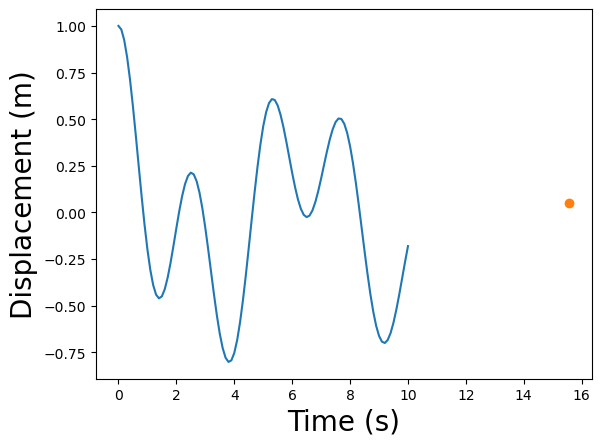

In [53]:
i=25

# for i in range(20, 40):
plt.figure()
plt.plot(t, x_train[i])
plt.plot(rtimes_tr[0, i], answers_tr[0, i], 'o')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Displacement (m)', fontsize=20)
plt.savefig('predict_answer_ddp')
plt.show()

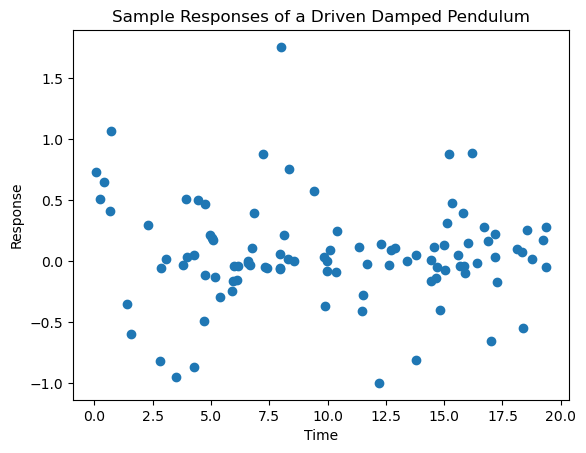

In [20]:
plt.plot(rtimes_tr[0, :100], answers_tr[0, :100], 'o')
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Sample Responses of a Driven Damped Pendulum')
plt.show()

In [21]:
np.save('rtimes_tr_driven.npy', rtimes_tr)
np.save('rtimes_va_driven.npy', rtimes_va)
np.save('rtimes_te_driven.npy', rtimes_te)

np.save('answers_tr_driven.npy', answers_tr)
np.save('answers_va_driven.npy', answers_va)
np.save('answers_te_driven.npy', answers_te)

In [ ]:
t = np.linspace(0, 10, 101)
plt.plot(t, x_train[9])
plt.plot(rtimes_tr[9], answers_tr[i], 'o')